# Chapter 17: Monte Carlo Methods

Welcome to Chapter 17! In this chapter, we delve into a powerful class of computational algorithms that rely on repeated random sampling to obtain numerical results: **Monte Carlo methods**. The underlying concept is remarkably simple yet profoundly effective: use randomness to solve problems that might be deterministic in principle but are too complex to solve analytically.

## The Core Idea: Using Random Sampling

At its heart, the Monte Carlo method leverages the **Law of Large Numbers (LLN)**. We learned that the average of results obtained from a large number of trials should be close to the expected value and will tend to become closer as more trials are performed.

Monte Carlo methods apply this principle to estimate quantities that are difficult to calculate directly. If we can express a quantity of interest as the expected value of some random variable, we can estimate it by:
1.  Simulating many random samples (realizations) of the random variable.
2.  Calculating the sample mean of these realizations.

**Why use them?**
* **Complexity:** They can tackle problems with complex geometries, high dimensionality, or intricate dependencies where analytical solutions are intractable.
* **Simulation:** They allow simulating complex systems (like queues, financial markets, physical processes) to understand their behavior and estimate key metrics.
* **Flexibility:** They can be adapted to a wide range of problems in physics, engineering, finance, statistics, and more.

**Example: Estimating Average Wait Time in a Queue**

Imagine a complex queueing system (e.g., a call center with variable call arrival rates, different agent skill levels, and complex routing rules). Calculating the exact average customer wait time analytically might be impossible. 

With Monte Carlo:
1.  **Model:** Define probability distributions for customer arrivals (e.g., Poisson process) and service times (e.g., Exponential distribution).
2.  **Simulate:** Run a simulation of the call center for a 'day' many times (e.g., 10,000 times). In each simulation run, track the wait time for each simulated customer.
3.  **Estimate:** Calculate the average wait time within each simulated day. Then, average these daily averages across all 10,000 simulations. By the LLN, this overall average will be a good estimate of the true long-run average wait time.

## Estimating Probabilities and Expected Values

Monte Carlo methods are particularly useful for estimating probabilities and expected values that arise from complex processes.

### Estimating Probabilities

To estimate the probability $P(A)$ of an event $A$, we can:
1.  Run $N$ independent simulations of the underlying random experiment.
2.  Count the number of times, $N_A$, that event $A$ occurs in the simulations.
3.  Estimate $P(A) \approx \frac{N_A}{N}$.

This is essentially calculating the empirical frequency of the event, which converges to the true probability as $N \to \infty$ by the LLN.

**Example: Estimating the Probability of Winning in Craps**

Craps is a dice game with somewhat complex rules for winning. We can simulate the game many times to estimate the overall probability of the 'shooter' winning.

**(Conceptual Code Structure)**
```python
def play_craps():
    # Roll dice, check rules (come-out roll: 7, 11 win; 2, 3, 12 lose)
    # If point established, continue rolling until point or 7
    # Return True if win, False if lose

N = 100000  # Number of simulations
wins = 0
for _ in range(N):
    if play_craps():
        wins += 1

estimated_prob_win = wins / N
print(f"Estimated P(Win) in Craps: {estimated_prob_win:.4f}")
```
(The actual probability is known to be approximately 244/495 ≈ 0.4929)

### Estimating Expected Values

To estimate the expected value $E[g(X)]$ of a function $g$ of a random variable $X$:
1.  Generate $N$ independent random samples $X_1, X_2, ..., X_N$ from the distribution of $X$.
2.  Calculate $g(X_i)$ for each sample.
3.  Estimate $E[g(X)] \approx \frac{1}{N} \sum_{i=1}^{N} g(X_i)$.

This again relies on the LLN, where the sample mean of $g(X_i)$ converges to $E[g(X)]$. This is extremely powerful when the distribution of $X$ or the function $g$ makes analytical calculation of the expectation difficult or impossible.

In [1]:
import numpy as np

# Example: Estimate E[e^X] where X ~ Normal(0, 1)
# Analytical answer: This is the MGF evaluated at t=1, which is e^(μt + σ^2*t^2/2) = e^(0*1 + 1^2*1^2/2) = e^(1/2) ≈ 1.6487

N = 100000  # Number of samples
mu = 0
sigma = 1

# 1. Generate samples from Normal(0, 1)
X_samples = np.random.normal(mu, sigma, N)

# 2. Apply the function g(x) = e^x
g_X_samples = np.exp(X_samples)

# 3. Calculate the sample mean
estimated_expectation = np.mean(g_X_samples)

print(f"Estimated E[e^X] where X ~ N(0, 1): {estimated_expectation:.4f}")
print(f"Analytical E[e^X]: {np.exp(0.5):.4f}")

Estimated E[e^X] where X ~ N(0, 1): 1.6470
Analytical E[e^X]: 1.6487


## Monte Carlo Integration

Monte Carlo methods provide a way to estimate definite integrals, especially useful in high dimensions where other numerical integration methods (like quadrature) become computationally expensive (the "curse of dimensionality").

### Method 1: Hit-or-Miss (Estimating Area)

This method is intuitive for estimating the area of a region $A$ within a larger region $B$ of known area $Area(B)$.
1.  Generate $N$ random points uniformly within the larger region $B$.
2.  Count the number of points, $N_{hit}$, that fall inside region $A$.
3.  The proportion of points falling inside $A$ approximates the ratio of the areas: $\frac{N_{hit}}{N} \approx \frac{Area(A)}{Area(B)}$.
4.  Estimate $Area(A) \approx Area(B) \times \frac{N_{hit}}{N}$.

A classic example is estimating $\pi$.

Estimated value of Pi: 3.13760


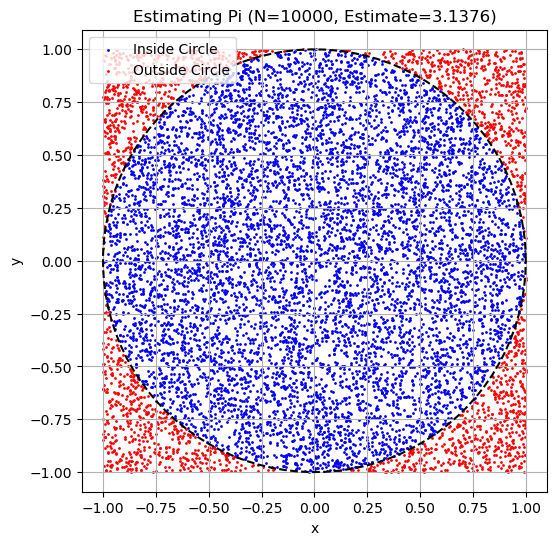

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Estimate Pi using Monte Carlo integration

N = 10000  # Number of random points

# Generate N points (x, y) uniformly in the square [-1, 1] x [-1, 1]
# Area of square B = 2 * 2 = 4
x_coords = np.random.uniform(-1, 1, N)
y_coords = np.random.uniform(-1, 1, N)

# Check if points are inside the unit circle (x^2 + y^2 <= 1)
# Area of circle A = pi * r^2 = pi * 1^2 = pi
distances_sq = x_coords**2 + y_coords**2
is_inside_circle = distances_sq <= 1

# Count hits
N_hit = np.sum(is_inside_circle)

# Estimate Area(A) = Area(B) * (N_hit / N)
estimated_pi = 4.0 * N_hit / N

print(f"Estimated value of Pi: {estimated_pi:.5f}")

# --- Visualization (Optional) ---
plt.figure(figsize=(6, 6))
plt.scatter(x_coords[is_inside_circle], y_coords[is_inside_circle], color='blue', s=1, label='Inside Circle')
plt.scatter(x_coords[~is_inside_circle], y_coords[~is_inside_circle], color='red', s=1, label='Outside Circle')

# Draw the circle boundary
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color='black', linestyle='--')

plt.title(f'Estimating Pi (N={N}, Estimate={estimated_pi:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

### Method 2: Using Expected Values

We often want to compute $I = \int_a^b g(x) dx$. We can rewrite this integral in terms of an expected value. Let $X$ be a random variable uniformly distributed on $[a, b]$. The PDF of $X$ is $f(x) = \frac{1}{b-a}$ for $x \in [a, b]$ and 0 otherwise.

Then, the expected value of $\frac{g(X)}{f(X)}$ is:
$$ E\left[\frac{g(X)}{f(X)}\right] = \int_a^b \frac{g(x)}{f(x)} f(x) dx = \int_a^b g(x) dx = I $$

Since $f(x) = \frac{1}{b-a}$ is constant, we have $\frac{g(X)}{f(X)} = (b-a)g(X)$. So,
$$ I = E[(b-a)g(X)] = (b-a) E[g(X)] $$

Therefore, we can estimate $I$ by:
1.  Generating $N$ samples $X_1, ..., X_N$ from $Uniform(a, b)$.
2.  Calculating $g(X_i)$ for each sample.
3.  Estimating $I \approx (b-a) \times \frac{1}{N} \sum_{i=1}^{N} g(X_i)$.

In [3]:
import numpy as np
from scipy import integrate

# Example: Estimate I = integral from 0 to 1 of exp(x^2) dx

def g(x):
    return np.exp(x**2)

a = 0.0
b = 1.0
N = 100000 # Number of samples

# 1. Generate samples from Uniform(a, b)
X_samples = np.random.uniform(a, b, N)

# 2. Calculate g(X_i)
g_X_samples = g(X_samples)

# 3. Estimate the integral
estimated_integral = (b - a) * np.mean(g_X_samples)

print(f"Monte Carlo estimate of integral: {estimated_integral:.5f}")

# Compare with SciPy's numerical integration (quad)
analytical_integral, error = integrate.quad(g, a, b)
print(f"SciPy quad estimate of integral: {analytical_integral:.5f} (error < {error:.1e})")

Monte Carlo estimate of integral: 1.46281
SciPy quad estimate of integral: 1.46265 (error < 1.6e-14)


## Generating Random Variables

Monte Carlo methods rely heavily on our ability to generate random numbers following specific probability distributions. While libraries like `numpy.random` provide generators for many common distributions, sometimes we need to generate variables from less common or custom distributions.

Two common techniques are the Inverse Transform Method and the Acceptance-Rejection Method.

### Inverse Transform Method

This method is applicable if the Cumulative Distribution Function (CDF), $F(x) = P(X \le x)$, is known and its inverse, $F^{-1}(u)$, can be computed.

**Theorem:** If $U$ is a random variable following a Uniform(0, 1) distribution, then the random variable $X = F^{-1}(U)$ has the CDF $F(x)$.

**Algorithm:**
1.  Generate a random number $u$ from Uniform(0, 1).
2.  Compute $x = F^{-1}(u)$. This $x$ is a random sample from the distribution with CDF $F(x)$.

**Example: Generating from Exponential($\lambda$)**
The CDF is $F(x) = 1 - e^{-\lambda x}$ for $x \ge 0$. To find the inverse:
Let $u = 1 - e^{-\lambda x}$.
$1 - u = e^{-\lambda x}$
$\ln(1 - u) = -\lambda x$
$x = -\frac{1}{\lambda} \ln(1 - u)$
So, $F^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u)$.
(Note: Since $U \sim Uniform(0, 1)$, then $1-U$ also follows $Uniform(0, 1)$. Therefore, we can often simplify and use $x = -\frac{1}{\lambda} \ln(u)$ instead.)

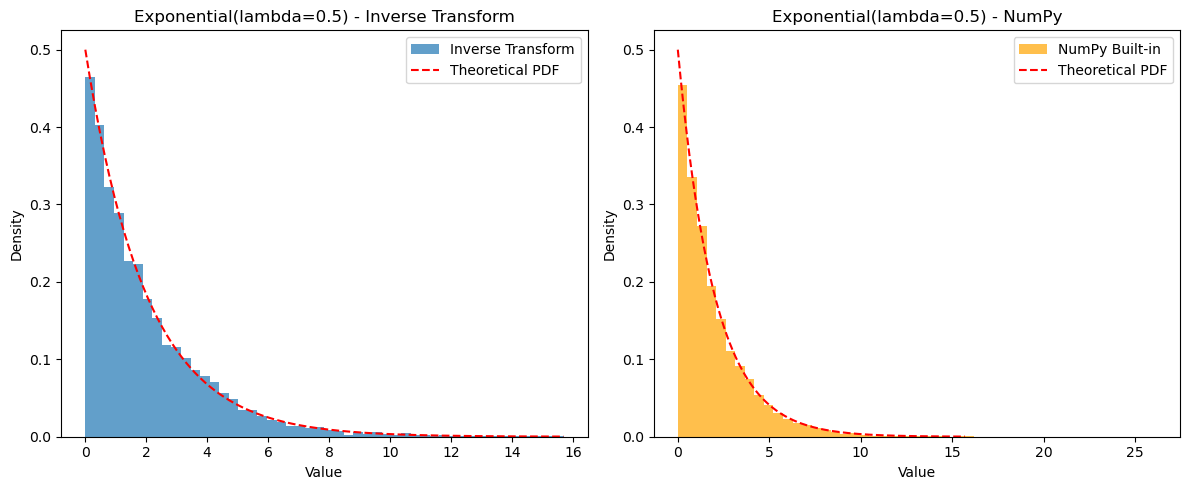

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_exponential_inverse_transform(lambda_rate, size=1):
    """Generates samples from Exponential(lambda_rate) using Inverse Transform."""
    u = np.random.uniform(0, 1, size=size)
    x = - (1 / lambda_rate) * np.log(u) # Using the simplified form
    return x

lambda_val = 0.5 # Rate parameter
N_samples = 10000

generated_samples = generate_exponential_inverse_transform(lambda_val, size=N_samples)

# Compare with numpy's built-in generator
numpy_samples = np.random.exponential(scale=1/lambda_val, size=N_samples) # Note: numpy uses scale = 1/lambda

# Plot histograms to compare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(generated_samples, bins=50, density=True, alpha=0.7, label='Inverse Transform')
plt.title(f'Exponential(lambda={lambda_val}) - Inverse Transform')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(numpy_samples, bins=50, density=True, alpha=0.7, label='NumPy Built-in', color='orange')
plt.title(f'Exponential(lambda={lambda_val}) - NumPy')
plt.xlabel('Value')
plt.ylabel('Density')

# Add theoretical PDF
x_vals = np.linspace(0, np.max(generated_samples), 200)
pdf_vals = lambda_val * np.exp(-lambda_val * x_vals)
plt.subplot(1, 2, 1)
plt.plot(x_vals, pdf_vals, 'r--', label='Theoretical PDF')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x_vals, pdf_vals, 'r--', label='Theoretical PDF')
plt.legend()

plt.tight_layout()
plt.show()

### Acceptance-Rejection Method

This method is useful when the inverse CDF is hard to compute, but we can easily evaluate the target PDF $f(x)$. It also requires a proposal distribution $g(x)$ (from which we *can* easily sample) and a constant $c$ such that $f(x) \le c \cdot g(x)$ for all $x$.

**Algorithm:**
1.  Generate a candidate sample $y$ from the proposal distribution $g(x)$.
2.  Generate a random number $u$ from Uniform(0, 1).
3.  Check if $u \le \frac{f(y)}{c \cdot g(y)}$.
    * If yes, **accept** $y$ as a sample from $f(x)$.
    * If no, **reject** $y$ and return to step 1.

The efficiency depends on the choice of $g(x)$ and $c$. The closer $c \cdot g(x)$ is to $f(x)$, the higher the acceptance probability (which is $1/c$).

**Example: Sampling from a truncated Normal distribution**
Suppose we want to sample from $N(0, 1)$ but restricted to the interval $[0, 2]$.
- Target PDF $f(x)$ is proportional to the standard Normal PDF within $[0, 2]$ and 0 otherwise.
- Proposal distribution $g(x)$ can be $Uniform(0, 2)$. The PDF is $g(x) = 1/2$ for $x \in [0, 2]$.
- We need $c$ such that $f(x) \le c \cdot g(x)$. The maximum of the standard Normal PDF is at $x=0$, which is $1/\sqrt{2\pi}$. So we need $ (1/\sqrt{2\pi}) \le c \cdot (1/2)$. We can choose $c = 2 / \sqrt{2\pi}$.
- The acceptance condition becomes $u \le \frac{f(y)}{c \cdot g(y)} = \frac{NormalPDF(y)}{ (2 / \sqrt{2\pi}) \cdot (1/2)} = \sqrt{2\pi} \cdot NormalPDF(y) = e^{-y^2/2}$.

Acceptance Rate: 0.595 (Theoretical min: 1.253)


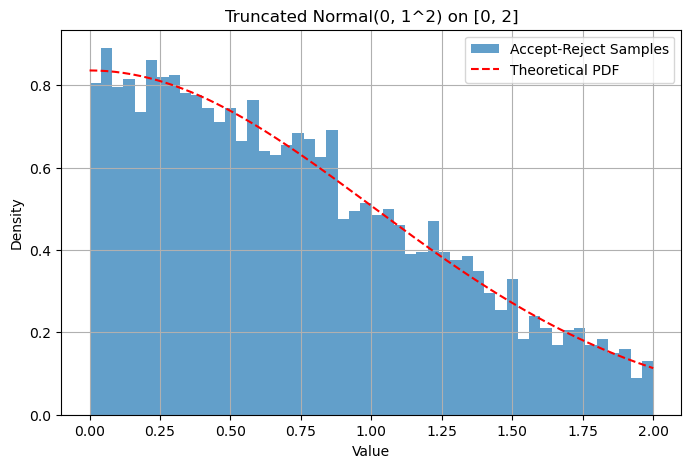

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_truncated_normal_accept_reject(mu, sigma, low, high, size=1):
    """Generates samples from N(mu, sigma) truncated to [low, high] using Accept-Reject."""
    samples = []
    # Use Uniform(low, high) as proposal distribution g(x)
    # PDF g(x) = 1 / (high - low)
    # Target PDF f(x) is proportional to norm.pdf(x, mu, sigma) in [low, high]
    # Find c such that norm.pdf(x) <= c * g(x)
    # Max of norm.pdf occurs at mu if mu is in [low, high], else at boundary
    x_mode = mu if low <= mu <= high else (low if mu < low else high)
    max_pdf = norm.pdf(x_mode, mu, sigma)
    c = max_pdf / (1 / (high - low))
    
    count_total = 0
    while len(samples) < size:
        count_total += 1
        # 1. Sample y from proposal g(x) = Uniform(low, high)
        y = np.random.uniform(low, high)
        
        # 2. Sample u from Uniform(0, 1)
        u = np.random.uniform(0, 1)
        
        # 3. Acceptance check: u <= f(y) / (c * g(y))
        target_pdf_val = norm.pdf(y, mu, sigma)
        proposal_pdf_val = 1 / (high - low)
        acceptance_ratio = target_pdf_val / (c * proposal_pdf_val)
        
        if u <= acceptance_ratio:
            samples.append(y)
            
    print(f"Acceptance Rate: {size / count_total:.3f} (Theoretical min: {1/c:.3f})")
    return np.array(samples)

mu_val = 0
sigma_val = 1
low_bound = 0
high_bound = 2
N_samples = 5000

generated_samples = generate_truncated_normal_accept_reject(mu_val, sigma_val, low_bound, high_bound, size=N_samples)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(generated_samples, bins=50, density=True, alpha=0.7, label='Accept-Reject Samples')

# Overlay theoretical truncated normal PDF (scaled)
x_vals = np.linspace(low_bound, high_bound, 200)
pdf_vals = norm.pdf(x_vals, mu_val, sigma_val)
# Need to normalize the PDF over the interval [low_bound, high_bound]
normalization_factor, _ = integrate.quad(lambda x: norm.pdf(x, mu_val, sigma_val), low_bound, high_bound)
plt.plot(x_vals, pdf_vals / normalization_factor, 'r--', label='Theoretical PDF')

plt.title(f'Truncated Normal({mu_val}, {sigma_val}^2) on [{low_bound}, {high_bound}]')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Hands-on Examples & Exercises

### Example 1: Buffon's Needle Problem

This classic problem uses Monte Carlo simulation to estimate $\pi$. Imagine dropping needles of length $L$ onto a floor with parallel lines spaced $D$ units apart ($L \le D$). What is the probability that a randomly dropped needle crosses one of the lines?

The analytical answer is $P(\text{cross}) = \frac{2L}{\pi D}$. We can estimate this probability via simulation and then solve for $\pi$.

**Simulation Setup:**
1.  Consider the position of the center of the needle $(y)$ relative to the nearest line below it. $y$ is uniformly distributed in $[0, D/2]$.
2.  Consider the angle $(\theta)$ the needle makes with the parallel lines. $\theta$ is uniformly distributed in $[0, \pi/2]$.
3.  The needle crosses a line if the vertical distance from its center to its tip ($ (L/2) \sin \theta $) is greater than the distance to the nearest line ($y$). That is, cross if $y \le (L/2) \sin \theta$.

**Algorithm:**
1.  Set $L$ and $D$ (e.g., $L=1, D=2$).
2.  Run $N$ simulations:
    a. Generate $y \sim Uniform(0, D/2)$.
    b. Generate $\theta \sim Uniform(0, \pi/2)$.
    c. Check if $y \le (L/2) \sin \theta$. Count as a 'hit' if true.
3.  Estimate $P(\text{cross}) \approx \frac{N_{hits}}{N}$.
4.  Estimate $\pi \approx \frac{2L}{D \times P(\text{cross})}$. (If $L=1, D=2$, then $\pi \approx \frac{1}{P(\text{cross})}$).

In [6]:
import numpy as np
import math

def estimate_pi_buffon(N=100000, L=1.0, D=2.0):
    """Estimates Pi using Buffon's Needle simulation."""
    if L > D:
        print("Warning: Method assumes L <= D")
        
    hits = 0
    for _ in range(N):
        # 1. Sample y from Uniform(0, D/2)
        y_center = np.random.uniform(0, D / 2.0)
        
        # 2. Sample theta from Uniform(0, pi/2)
        theta = np.random.uniform(0, math.pi / 2.0)
        
        # 3. Check for crossing
        vertical_dist_tip = (L / 2.0) * math.sin(theta)
        if y_center <= vertical_dist_tip:
            hits += 1
            
    # Estimate probability
    prob_cross = hits / N
    
    # Estimate Pi
    if prob_cross == 0: # Avoid division by zero if N is very small / unlucky
        return None, 0
        
    estimated_pi = (2 * L) / (D * prob_cross)
    return estimated_pi, prob_cross

# Run simulation
num_simulations = 500000
needle_length = 1.0
line_spacing = 2.0

pi_estimate, p_cross_estimate = estimate_pi_buffon(num_simulations, needle_length, line_spacing)

print(f"Buffon's Needle Simulation (N={num_simulations}, L={needle_length}, D={line_spacing})")
print(f"Estimated P(Cross): {p_cross_estimate:.5f}")
if pi_estimate is not None:
    print(f"Estimated Pi: {pi_estimate:.5f}")
    print(f"Absolute Error: {abs(pi_estimate - math.pi):.5f}")

Buffon's Needle Simulation (N=500000, L=1.0, D=2.0)
Estimated P(Cross): 0.31878
Estimated Pi: 3.13694
Absolute Error: 0.00465


### Exercises

1.  **Poker Probability:** Write a simulation to estimate the probability of being dealt a "flush" (five cards of the same suit) from a standard 52-card deck. Compare your estimate to the known analytical probability.
2.  **Monte Carlo Integration:** Estimate the value of $\int_0^\pi \sin(x) dx$ using the expected value method (Method 2). The analytical answer is 2. How does the accuracy change as you increase the number of samples $N$?
3.  **Custom Distribution:** Use the Acceptance-Rejection method to generate samples from a distribution whose PDF is proportional to $f(x) = 1 + \sin(2\pi x)$ for $x \in [0, 1]$. Use $Uniform(0, 1)$ as the proposal distribution. Plot a histogram of your samples.

## Chapter Summary

Monte Carlo methods are a versatile and powerful set of techniques based on random sampling.
* They leverage the **Law of Large Numbers** to approximate quantities of interest.
* They are particularly effective for **estimating probabilities and expected values** in complex scenarios where analytical solutions are difficult.
* **Monte Carlo Integration** provides a way to estimate definite integrals, especially valuable in high dimensions or for complex integrands.
* Generating random variables from specific distributions is crucial. Techniques like the **Inverse Transform Method** (when the inverse CDF is available) and the **Acceptance-Rejection Method** (when the PDF is known) allow us to sample from custom distributions.
* The accuracy of Monte Carlo estimates generally improves as the number of simulations ($N$) increases, typically scaling with $1/\sqrt{N}$.

These methods form the foundation for many advanced simulation techniques used across science, engineering, and finance.